## Churn Prediction Model for Telecom Data

We are going to use Logistic Regression model and SMOTE for preprocessing our data in order to predict how many customers are likely to churn, Also we are going to check features that are important in our dataset in order to make strategic business decisions based on important features.

The dataset contains Telecom customer churn data with 3,333 rows and 11 features

# For Preprocessing:

Class Imbalance Handling:
The dataset is imbalanced (only ~14.5% churners).

 Strategies used:
 
Stratified sampling during train-test split (stratify=y) and SMOTE for oversampling or class weighting in models.

In [16]:
#import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
#load the dataset
df = pd.read_csv('telecom_churn.csv')
df.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


# Data Preprocessing

We are going to use SMOTE for Preprocessing
What is SMOTE?
* SMOTE is an oversampling technique that generates synthetic samples of the minority class (here, churn = 1) to balance the dataset.

* It helps improve model performance on imbalanced datasets by providing more examples of the minority class.

In [3]:
pip install imbalanced-learn

In [6]:
#separate feature and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [7]:
#split data into training and testing sest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [8]:
#check the class distribution
print(y_train.value_counts(normalize=True))

Churn
0    0.855214
1    0.144786
Name: proportion, dtype: float64


In [9]:
# apply SMOTE to traning data 
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [11]:
print("Before SMOTE:")
print(y_train.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())

Before SMOTE:
Churn
0    2280
1     386
Name: count, dtype: int64

After SMOTE:
Churn
0    2280
1    2280
Name: count, dtype: int64


In [12]:
#feature scaling
scaler = StandardScaler()
X_train_resampled = scaler.fit_transform(X_train_resampled)
X_test = scaler.transform(X_test)

In [13]:
model = LogisticRegression(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_pred = model.predict(X_test)

In [15]:
#Predict and evaluate
y_pred = model.predict(X_test)
print("\nClassification Report (Test Set):")
print(classification_report(y_test, y_pred))


Classification Report (Test Set):
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       570
           1       0.35      0.69      0.47        97

    accuracy                           0.77       667
   macro avg       0.64      0.74      0.66       667
weighted avg       0.85      0.77      0.80       667



* Key Insights: 
        The model is better at identifying customers who will not churn (high true negatives).

        The recall for the churn class (ability to catch actual churners) is 68%.

        The precision for the churn class (how many predicted churners actually churned) is 35%.

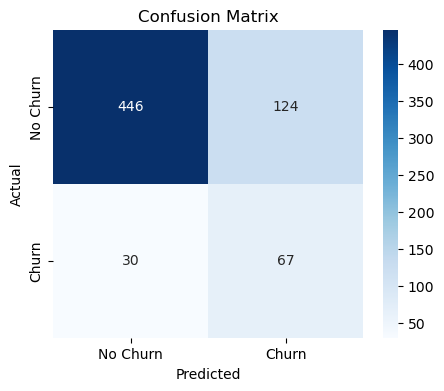

In [17]:
#Confusion Matrix Visualization
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

* Insights:

  True Negatives - 446 customers who did not churn were correctly predicted as "No Churn".

  True Positives - 67 customers who churned were correctly predicted as "Churn".

In [19]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
# Absolute value for importance ranking
feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Abs_Coefficient', ascending=False)
print(feature_importance)

           Feature  Coefficient  Abs_Coefficient
2         DataPlan    -1.430370         1.430370
1  ContractRenewal    -1.272174         1.272174
4    CustServCalls     0.853634         0.853634
7    MonthlyCharge     0.648488         0.648488
5          DayMins     0.399217         0.399217
3        DataUsage     0.388153         0.388153
8       OverageFee     0.249844         0.249844
9         RoamMins     0.152406         0.152406
0     AccountWeeks     0.085714         0.085714
6         DayCalls     0.082652         0.082652


Key insights :

* DataPlan and ContractRenewal have the largest negative coefficients.These features are strong protective factors against churn.

* Customer Service Calls, MonthlyCharge, and other features have positive coefficients.Higher values of these features increase the likelihood of churn.

C:\Users\Rebecca\AppData\Local\Temp\ipykernel_2516\3548325034.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


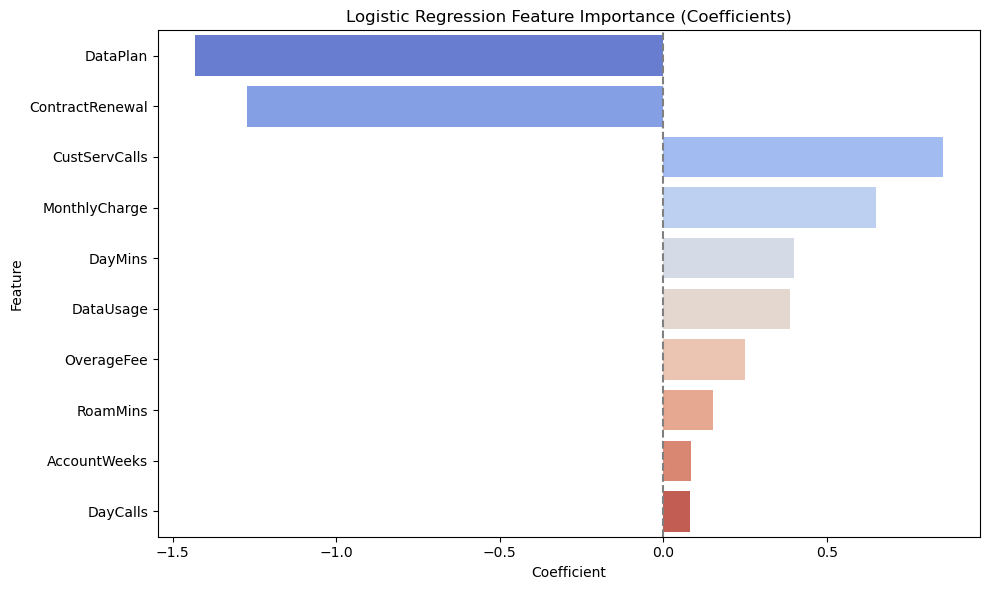

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Coefficient', y='Feature',
    data=feature_importance,
    palette='coolwarm'
)
plt.title('Logistic Regression Feature Importance (Coefficients)')
plt.axvline(0, color='gray', linestyle='--')
plt.tight_layout()
plt.show()

* The plot shows that having a data plan and contract renewal are the most effective factors for keeping customers, while frequent customer service calls and high monthly charges are the biggest churn risks.

# XGBoost model for predicting churn

In [30]:
pip install xgboost

   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.0/150.0 MB 5.6 MB/s eta 0:00:27
   ---------------------------------------- 1.8/150.0 MB 5.0 MB/s eta 0:00:30
    --------------------------------------- 2.4/150.0 MB 4.5 MB/s eta 0:00:34
    --------------------------------------- 2.9/150.0 MB 3.8 MB/s eta 0:00:39
    --------------------------------------- 3.4/150.0 MB 3.5 MB/s eta 0:00:43
   - -------------------------------------- 3.9/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 4.5/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 5.2/150.0 MB 3.1 MB/s eta 0:00:48
   - -------------------------------------- 5.5/150.0 MB 3.0 MB/s eta 0:00:49
   - -------------------------------------- 6.0/150.0 MB 2.9 MB/s eta 0:00:50
   - -------------------------------------- 6.8/150.0 MB 3.0 MB/s eta 0:00:49
   - -------------------------------------- 7.3/150.0 MB 2.9 MB/s eta 0

In [32]:
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

In [35]:
#training XGBoost model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42, n_estimators=100, max_depth=4, learning_rate=0.1)
xgb_model.fit(X_train_resampled, y_train_resampled)

c:\Users\Rebecca\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:19:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [37]:
# Predict on test set
y_pred = xgb_model.predict(X_test)
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]

In [38]:
#Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC Score: {roc_auc:.4f}")

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       570
           1       0.59      0.71      0.64        97

    accuracy                           0.89       667
   macro avg       0.77      0.81      0.79       667
weighted avg       0.90      0.89      0.89       667

ROC AUC Score: 0.8656


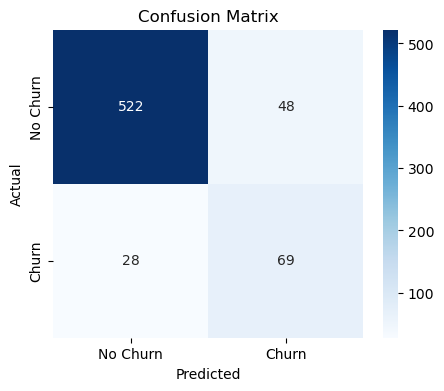

In [39]:
# Confusion matrix plot
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<Figure size 1000x600 with 0 Axes>

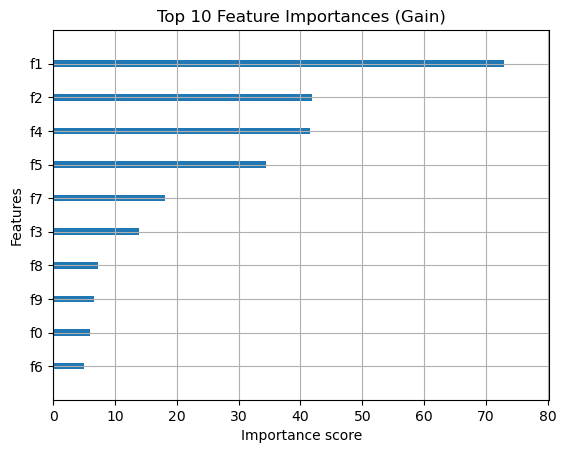

In [40]:
#Feature importance plot
plt.figure(figsize=(10,6))
plot_importance(xgb_model, max_num_features=10, importance_type='gain', show_values=False)
plt.title('Top 10 Feature Importances (Gain)')
plt.show()

In [41]:
# feature importance values
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(importance_df.head(10))


Feature Importances:
           Feature  Importance
1  ContractRenewal    0.294486
2         DataPlan    0.168974
4    CustServCalls    0.167965
5          DayMins    0.139133
7    MonthlyCharge    0.073318
3        DataUsage    0.055961
8       OverageFee    0.029385
9         RoamMins    0.026564
0     AccountWeeks    0.024026
6         DayCalls    0.020188


# Business Implications
    Retention Strategies:

    Promote data plans and encourage contract renewals to reduce churn.

    Monitor customers with frequent service calls and high charges for proactive retention offers.

    Service Improvements:

    Investigate and address reasons for high customer service calls to reduce dissatisfaction.